# Análise de sentimentos com RNN

Neste trabalho, foi implementada uma rede neural recorrente que realiza a análise de sentimentos. Foi utilizado [Conjunto de dados Brazilian E-Commerce Public Dataset by Olist da Kaggle.](https://www.kaggle.com/olistbr/brazilian-ecommerce) que contém informações sobre pedidos, produtos comprados, comentários de clientes e avaliações de 1 a 5 que serão utilizadas para fazer a classificação entre comentarios positivos e negativos. 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dados/olist_order_reviews_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [4]:
df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


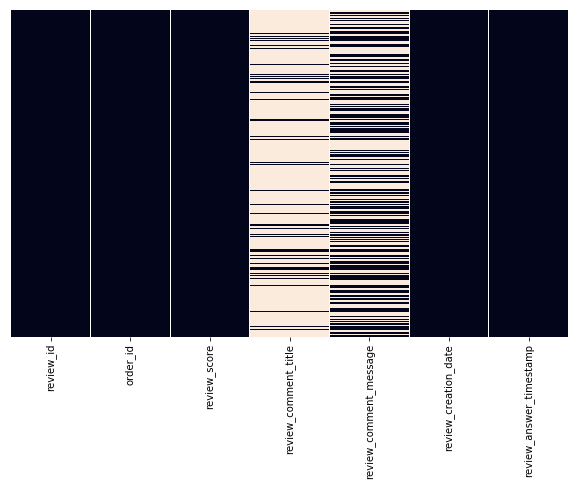

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

In [7]:
# Cria um df apenas com os comentarios e score
# E remove os valores NAN
df1 = df[['review_score','review_comment_message']]
df1.dropna(inplace=True)
df1.head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."
16,2,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
19,1,Péssimo
22,5,Loja nota 10
24,5,obrigado pela atençao amim dispensada
27,5,A compra foi realizada facilmente.\r\nA entreg...


In [19]:
lim = 100
c = 0
for row in df1.values:
    print(row[0], '==>', row[1])
    c += 1
    if( c == lim):
        break
#list(df1['review_comment_message'])

5 ==> Recebi bem antes do prazo estipulado.
5 ==> Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa
4 ==> aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
4 ==> Mas um pouco ,travando...pelo valor ta Boa.

5 ==> Vendedor confiável, produto ok e entrega antes do prazo.
2 ==> GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU
1 ==> Péssimo
5 ==> Loja nota 10
5 ==> obrigado pela atençao amim dispensada
5 ==> A compra foi realizada facilmente.
A entrega foi efetuada muito antes do prazo dado.
O produto já começou a ser usado e até o presente,
sem problemas.
5 ==> relógio muito bonito e barato.
1 ==> Não gostei ! Comprei gato por lebre
1 ==> Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e aind

In [20]:
labels , reviews = df1['review_score'].values,df1['review_comment_message'].apply(str.lower).values

## Pré-processamento de dados

Codifica cada palavra como um numero inteiro e remove toda a pontuação.


In [21]:
# punctuation é uma lista de strings de pontuação {'.', ',', ';', '!' ...}
from string import punctuation

# Remove pontuação e outros caracteres
reviews_split= []
for review in reviews:
    reviews_split.append(''.join([c for c in review if c not in punctuation]).replace('\r\n',' '))

all_text = ' '.join(reviews_split)

# Cria uma lista com as palavras
words = all_text.split()

In [9]:
words[:30]

['recebi',
 'bem',
 'antes',
 'do',
 'prazo',
 'estipulado',
 'parabéns',
 'lojas',
 'lannister',
 'adorei',
 'comprar',
 'pela',
 'internet',
 'seguro',
 'e',
 'prático',
 'parabéns',
 'a',
 'todos',
 'feliz',
 'páscoa',
 'aparelho',
 'eficiente',
 'no',
 'site',
 'a',
 'marca',
 'do',
 'aparelho',
 'esta']

In [22]:
reviews_split[:5]

['recebi bem antes do prazo estipulado',
 'parabéns lojas lannister adorei comprar pela internet seguro e prático parabéns a todos feliz páscoa',
 'aparelho eficiente no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nomeatualizar com a marca correta uma vez que é o mesmo aparelho',
 'mas um pouco travandopelo valor ta boa ',
 'vendedor confiável produto ok e entrega antes do prazo']

In [23]:
dfe = pd.read_pickle('vocab_to_int')

In [24]:
dfe['o']

1

### Codifica as palavras

Cria um dicionário que mapeia as palavras no vocabulário para números inteiros.Em seguida, converte-se cada um dos  comentarios em números inteiros para que possam ser passados para a rede.



In [25]:
from collections import Counter

## Constroi um dict que mapeia palavras para inteiros
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

## Usa o dict para ccodificar cada comentario em reviews_split
## Armazenar os comentários em reviews_ints
reviews_ints = []
for review in reviews_split:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])

In [29]:
print('Palavras unicas: ', len((vocab_to_int)), '\n')  

#imprime primeiro comentario codificado
print('Comentário codificado: \n', reviews_ints[:1])

Palavras unicas:  20190 

Comentário codificado: 
 [[15, 28, 13, 6, 9, 232]]


In [33]:
# Mapeamento de palavras em números
vocab_to_string = { ii: word for word, ii  in vocab_to_int.items()}
print(vocab_to_string)

{1: 'o', 2: 'produto', 3: 'e', 4: 'a', 5: 'de', 6: 'do', 7: 'não', 8: 'que', 9: 'prazo', 10: 'muito', 11: 'entrega', 12: 'com', 13: 'antes', 14: 'chegou', 15: 'recebi', 16: 'no', 17: 'foi', 18: 'é', 19: 'bom', 20: 'um', 21: 'recomendo', 22: 'entregue', 23: 'da', 24: 'em', 25: 'veio', 26: 'para', 27: 'na', 28: 'bem', 29: 'mas', 30: 'comprei', 31: 'uma', 32: 'qualidade', 33: 'eu', 34: 'loja', 35: 'ainda', 36: 'tudo', 37: 'compra', 38: 'meu', 39: 'mais', 40: 'estou', 41: 'gostei', 42: 'só', 43: 'até', 44: 'como', 45: 'ótimo', 46: 'excelente', 47: 'super', 48: 'me', 49: 'por', 50: 'os', 51: 'as', 52: 'dentro', 53: 'minha', 54: 'pedido', 55: 'rápida', 56: 'nao', 57: 'já', 58: 'dia', 59: 'boa', 60: 'produtos', 61: 'se', 62: 'site', 63: 'sem', 64: 'lannister', 65: 'pois', 66: 'mesmo', 67: 'ser', 68: 'porém', 69: 'rápido', 70: 'sempre', 71: 'está', 72: 'agora', 73: 'perfeito', 74: 'dias', 75: 'comprar', 76: '2', 77: 'certo', 78: 'conforme', 79: 'ótima', 80: 'parabéns', 81: 'pra', 82: 'pelo', 8

### Codifica as avaliações

As avaliações são numeros de 1 a 5. Para usar esses valores, é necessario converte-los para 'positivo' e 'negativo' 0 e 1,respectivamente. Os comentarios com nota 3 ou menor foram classificados como negativos e o restante sendo como positivos.


In [34]:
encoded_labels = [1 if c>3 else 0 for c in labels]

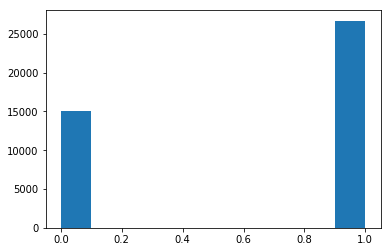

In [35]:
plt.hist(encoded_labels); # Qtd de positivos (1) e negativos (0) depois de mapear {1,2,3} => Zero| Negativo, resto Um|Positivo

In [36]:
# Comentarios  
review_lens = Counter([len(x) for x in reviews_ints])
print("Comentários de tamanho zero: {}".format(review_lens[0]))
print("Tamanho máximo de um comentário: {}".format(max(review_lens)))

Comentários de tamanho zero: 132
Tamanho máximo de um comentário: 45


In [37]:
## Remove quaisquer comentários / etiquetas com comprimento zero da lista reviews_ints.

# Obtem indices de comentarios com comprimento difrente de zero
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# Remove comntarios de tamanho zero
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])
reviews_ints = reviews_ints[:41500]
encoded_labels = encoded_labels[:41500]

---


Para lidar com avaliações curtas e muito longas, preenchemos ou truncamos todos os comentários para um tamanho específico. Para comentários mais curtos do que `seq_length`,preenche-se com 0s. Para revisões maiores que `seq_length`, são truncadas para as primeiras palavras `seq_length`.

Exemplo, se  `seq_length = 10` e um comentário de entrada forem:
`` 
[117, 18, 128].
`` 
A sequência resultante  deve ser:

`` 
[0, 0, 0, 0, 0, 0, 0, 117, 18, 128]
`` 


In [38]:
def pad_features(reviews_ints, seq_length):

    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [39]:
seq_length = 20 # cada comentario na rede será de size = 20

features = pad_features(reviews_ints, seq_length=seq_length)

# imprime os primeiros 10 valores dos primeiros 30 lotes
print(features[:30,:10])

[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   80  156   64   94   75]
 [ 433  358   16   62    4  376    6  433  131 2429]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  186    5  174    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   4   37   17  498 2430    4   11   17  809   10]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [  70  162  106  446    3    4   11 1942   13    6]
 [   0    0    0   15  228    1    8  168   51  326]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0

## Training, Validation, Test

Com dados formatados,dividimos em conjuntos de treinamento, validação e teste.



In [40]:
split_frac = 0.8 # Dividir 80% para treino e 20% para teste

## Separa os dados em treino, validação e teste

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(33200, 20) 
Validation set: 	(4150, 20) 
Test set: 		(4150, 20)


In [41]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# cria Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 25

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [26]:
#Checa se tem GPU
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):
    print('Treina em GPU.')
else:
    print('GPU não disponivel, treina em CPU.')

GPU não disponivel, treina em CPU.


In [42]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_sizes = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_sizes, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [43]:
#  Instancia o modelo com os parâmetros
vocab_size = len(vocab_to_int)+1 
output_size = 1         # nó de saida
embedding_dim = 200     # cada palavra vai ser convertida em um array de 200
hidden_dim = 256        # 256 neuronios na hidden layer
n_layers = 2            # 2 camdas de hidden layer

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(20191, 200)
  (lstm): LSTM(200, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


TESTANDO Embedding

In [44]:
# Funçoes de perda e otimização
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [45]:
# Treina o modelo
if(not train_on_gpu):
    raise print('Sem gpu') 
epochs = 1 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity    
    
net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                valid_loss = np.mean(val_losses)
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            
            # save model if validation loss has decreased
            if valid_loss <= valid_loss_min:
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
                torch.save(net.state_dict(), 'model.pt')
                valid_loss_min = valid_loss

NameError: name 'train_on_gpu' is not defined

A Etapa anterior treina o modelo, Agora, só vamos carregálo

# CARREGANDO MODELO

In [46]:
#carrega o modelo treinado
net.load_state_dict(torch.load('model.pt',map_location='cpu') )

In [49]:
train_on_gpu = False

In [50]:
# Testa o modelo nos dados de teste

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs.long(), h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.286
Test accuracy: 0.881


In [51]:
# Exemplo de texto que será testado: negative test review
test_review_neg = 'O produto não chegou'

In [52]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int.get(word) for word in test_words if vocab_to_int.get(word) != None ])
    

    return test_ints

In [53]:
def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor.long(), h)
    
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")
    return feature_tensor

In [54]:
# positive test review
test_review_pos = 'bom '
# negative test review
test_review_neg = 'ruim '
# test otimo, comparar com bom
test_review_poscomp = 'otimo'
# pessimo

In [55]:
# call function
seq_length=20 # good to use the length that was trained on
# positive test review
bom = predict(net, test_review_pos, seq_length)
# negative test review
ruim = predict(net, test_review_neg, seq_length)
# otimo
otimo = predict(net, test_review_poscomp, seq_length)
# perfeito
perfeito = predict(net, 'perfeito', seq_length)
pessimo = predict(net, 'pessimo', seq_length)

Prediction value, pre-rounding: 0.723452
Positive review detected!
Prediction value, pre-rounding: 0.133240
Negative review detected.
Prediction value, pre-rounding: 0.962571
Positive review detected!
Prediction value, pre-rounding: 0.963451
Positive review detected!
Prediction value, pre-rounding: 0.205823
Negative review detected.


In [56]:
return_bom = net.embedding(bom.long())
return_ruim = net.embedding(ruim.long())
return_otimo = net.embedding(otimo.long())
return_perfeito = net.embedding(perfeito.long())
return_pessimo = net.embedding(pessimo.long())

In [89]:
return_bom[0][19]

tensor([-2.4676e-01,  1.1805e-01,  1.5636e+00, -8.3229e-01, -5.0874e-02,
        -8.9369e-02, -7.3762e-01, -1.0032e+00, -1.9031e+00, -4.4981e-01,
        -4.1105e-02, -2.7855e+00,  6.2348e-01, -1.2861e+00,  3.8327e-01,
        -4.0105e-01, -8.6310e-02, -1.9335e+00, -2.4755e-01, -1.0096e+00,
        -1.7725e-01, -7.0654e-01, -3.8327e-01,  6.3137e-01, -3.7050e-01,
         1.7888e+00, -5.4691e-01, -1.7090e+00, -3.7372e-01,  2.7322e-01,
         1.4365e+00, -7.8980e-01, -1.1108e+00,  7.2507e-01, -1.0563e+00,
        -5.2727e-01,  4.5880e-01, -6.1971e-01,  1.1555e-01,  8.5642e-01,
         1.3433e+00, -1.0086e+00, -7.3384e-01,  2.7048e-01, -4.0567e-01,
         1.1626e+00,  6.2044e-01,  1.2366e+00,  4.2929e-01, -5.8061e-01,
         9.7797e-02, -1.6227e+00, -3.0155e-01, -3.6096e-01, -6.1306e-01,
        -1.2513e-01,  1.7408e+00, -9.7570e-01,  5.0406e-01, -1.7028e-01,
         5.8203e-02,  7.7028e-01, -1.2359e+00,  6.7066e-01, -1.1945e+00,
         1.8026e-01,  2.2272e-01,  1.0941e+00, -9.9

In [90]:
return_ruim[0][19]

tensor([-7.3559e-01,  6.7225e-01,  1.5748e-01, -1.5258e+00,  4.8572e-02,
         8.7246e-01, -6.8989e-01, -6.0484e-01,  1.3607e+00,  2.2739e-01,
        -4.3449e-01, -1.2861e-01, -4.4575e-01,  6.4795e-01,  1.3645e+00,
        -1.0745e-01,  3.6154e-01,  1.5758e+00, -8.0703e-01, -3.3771e-01,
        -9.1336e-01,  3.7594e-01, -7.6276e-01, -1.8670e+00,  1.4366e+00,
         7.8503e-01, -1.9881e-01, -1.9246e+00,  6.7957e-01, -6.3952e-01,
         1.4596e+00,  7.1720e-01,  1.2583e+00, -1.0646e+00, -4.2889e-01,
         7.2406e-01, -4.4467e-01,  1.2550e-01, -3.0871e+00,  1.0916e-02,
        -4.2811e-01,  1.4858e-01, -1.1589e+00, -4.5689e-01, -7.1291e-01,
         8.6501e-01, -1.0954e+00, -1.3681e+00,  9.9389e-01,  1.7139e+00,
         6.8194e-01,  9.3903e-01,  8.7533e-01, -6.8721e-01, -6.8783e-01,
         1.1979e+00,  1.5978e-01, -1.2625e+00, -6.5417e-01,  1.6511e+00,
         1.2488e+00,  1.3989e+00,  2.0572e+00,  1.1219e+00, -3.3708e-01,
        -6.0668e-01,  1.0386e-01,  2.3124e-01,  5.8

In [91]:
return_otimo[0][19]

tensor([ 0.2444,  0.8225,  1.1873, -0.3616, -0.0613, -1.4302, -1.4470,  0.2000,
        -1.4109, -1.0191, -0.3758,  0.1080,  0.9857, -0.3059, -0.7407,  0.3239,
        -0.8606,  0.2745, -0.7912, -0.0212,  0.1954, -0.8516, -0.3784,  1.8163,
        -1.9441, -0.2146, -0.0329, -0.1512,  1.1150, -0.0850, -1.0572, -1.2039,
         0.8029,  0.0366, -0.2559,  0.4977,  0.5587, -0.3833,  0.3353,  0.8710,
        -0.8694, -0.2534,  1.4035, -0.0628, -0.0064, -2.3725,  1.3909, -0.2067,
        -1.4011,  0.3899, -0.9840, -0.8652,  0.1232, -1.1411, -1.1202,  0.4021,
         1.3989, -1.6278, -0.7419,  0.2048, -1.5477,  0.3970,  1.1877,  1.0400,
         0.9284,  0.6795, -0.3483, -0.8700, -0.8613,  2.0476, -0.7894,  0.5530,
         0.1389, -0.3383,  1.3864, -0.5490, -0.0317,  1.4013,  0.4979, -0.6179,
         0.4099, -1.6067, -0.4034,  1.8936,  0.5273, -1.4916,  1.0726, -0.9027,
        -0.9127, -1.0178, -0.8434,  0.3147,  0.1784,  1.0148, -1.2524,  0.9622,
        -1.3425,  0.6372, -0.7985, -0.89

In [151]:
# return_otimo.detach().numpy()[0][19] ## Converte em Numpy, tem que usar detach primeiro e depois pegar o que voce^ quer
tensor_dot(return_otimo, return_bom)

-1.1387353

In [149]:
def tensor_dot(x,y):
    return np.dot(x.detach().numpy()[0][19], y.detach().numpy()[0][19])

# abs(return_otimo[0][19][0].item() - return_ruim[0][19][0].item())
def diff_tensors(x,y):
    sun = 0
    for i in range(200):
        sun += abs(x[0][19][i].item() - y[0][19][i].item())
    return sun

def tensor_value(x):
    sun = 0
    for i in range(200):
        sun += x[0][19][i].item()
    return sun

In [137]:
dict_tensors = [('otimo', return_otimo),
               ('bom', return_bom),
               ('ruim', return_ruim),
               ('perfeito', return_perfeito),
               ('pessimo', return_pessimo),]

In [138]:
for i in dict_tensors:
    print(i[0])
    print(tensor_value(i[1]), '\n')

otimo
-5.201962493360043 

bom
-12.803821951034479 

ruim
3.619095387060952 

perfeito
-4.199967821594328 

pessimo
1.3982143647153862 



In [152]:
tensor_dot(return_otimo, return_bom)

-1.1387353

In [153]:
tensor_dot(return_otimo, return_ruim)

-6.6836553

In [154]:
tensor_dot(return_otimo, return_perfeito)

18.514029

In [58]:
# Exemplo de chamada de predição
seq_length=20 # good to use the length that was trained on
print(test_review_neg)
predict(net, test_review_neg, seq_length)

ruim 
Prediction value, pre-rounding: 0.133240
Negative review detected.


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0, 263]], dtype=torch.int32)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report